In [30]:
setwd("/root/workspace/code/sc-transformer/eval/plot")
source("/root/workspace/code/sc-transformer/preprocess/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(scales)


In [31]:
outdir <- "../../paper/5"
mkdir(outdir, remove_old = F)

# scib <- as.data.frame(read.xls("data/scib_metrics_sota+mosaic_dogma_e0_sp_00001899_sorted+less_mod.xlsx"))
scib <- as.data.frame(read.xls("data/scib_metrics_sota+mosaic_dogma_e0_sp_00001899_sorted.xlsx"))
scib_transfer <- as.data.frame(read.xls("data/scib_metrics_sota+mosaic_dogma_e0_sp_00003699_sorted.xlsx"))
scmib_midas <- as.data.frame(read.xls("data/scmib_metrics_dogma_sp_00001899_sorted.xlsx"))
scmib_midas_transfer <- as.data.frame(read.xls("data/scmib_metrics_dogma_sp_00003699_sorted.xlsx"))

names(scib)[1]                 <- "Method"
names(scib_transfer)[1]        <- "Method"
names(scmib_midas)[1]          <- "Task"
names(scmib_midas_transfer)[1] <- "Task"

# scib_sota           <- scib[scib[["Method"]] != "midas_embed", ]
scib_midas          <- scib[scib[["Method"]] == "midas_embed", ]
scib_midas_transfer <- scib_transfer[scib_transfer[["Method"]] == "midas_embed", ]
scib_all            <- merge(scib_midas, scib_transfer, by = names(scib_midas), all = T)


In [32]:

task_h <- setdiff(scib_midas[["Task"]], scmib_midas[["Task"]])
rows_append <- seq(nrow(scmib_midas) + 1,  nrow(scmib_midas) + length(task_h))
scmib_midas[rows_append, "Task"] <- task_h
scmib_midas_transfer[rows_append, "Task"] <- task_h


In [33]:

scib_midas           <- add_column(scib_midas,           "Transfer" = "De novo (scIB)",   .before = "Task")
scib_midas_transfer  <- add_column(scib_midas_transfer,  "Transfer" = "Transfer (scIB)",  .before = "Task")
scmib_midas          <- add_column(scmib_midas,          "Transfer" = "De novo (scMIB)",  .before = "Task")
scmib_midas_transfer <- add_column(scmib_midas_transfer, "Transfer" = "Transfer (scMIB)", .before = "Task")

scib_midas_transfer[["Task"]]  <- str_replace_all(scib_midas_transfer[["Task"]],  c("_transfer" = ""))
scmib_midas_transfer[["Task"]] <- str_replace_all(scmib_midas_transfer[["Task"]], c("_transfer" = ""))


In [34]:
scib_merge  <- merge(scib_midas,  scib_midas_transfer,  by = names(scib_midas),  all = T)[, -1]
scmib_merge <- merge(scmib_midas, scmib_midas_transfer, by = names(scmib_midas), all = T)
scib_merge  <- scib_merge[c("Transfer", "Task", "overall_score")]
scmib_merge <- scmib_merge[c("Transfer", "Task", "overall_score")]
ib_merge    <- merge(scib_merge,  scmib_merge, by = names(scib_merge),  all = T)
ib_merge

Transfer,Task,overall_score
<chr>,<chr>,<dbl>
De novo (scIB),dogma_full,0.7907523
De novo (scIB),dogma_paired_a,0.6922148
De novo (scIB),dogma_paired_ab,0.7513447
De novo (scIB),dogma_paired_abc,0.7803720
De novo (scIB),dogma_paired_ac,0.7777609
De novo (scIB),dogma_paired_b,0.7686980
De novo (scIB),dogma_paired_bc,0.7683160
De novo (scIB),dogma_paired_c,0.7712680
De novo (scIB),dogma_paired_full,0.7801507


In [35]:
names(ib_merge) <- c("Training strategy", "Task", "Overall score")
ib_merge[["Task"]] <- str_replace_all(ib_merge[["Task"]], c("_" = "-",
                                                "-paired-full" = "-paired+full",
                                                "-single-full" = "-diagonal+full",
                                                "-single$" = "-diagonal",
                                                "-single" = ""
                                                ))


In [36]:
ib_merge[["Training strategy"]] <- factor(x = ib_merge[["Training strategy"]],
                                          levels = c("De novo (scIB)",
                                                     "Transfer (scIB)",
                                                     "De novo (scMIB)",
                                                     "Transfer (scMIB)"))
ib_merge[["Task"]] <- factor(x = ib_merge[["Task"]], levels = c(
    "dogma-full",
    "dogma-paired+full",
    "dogma-paired-abc",
    "dogma-paired-ab",
    "dogma-paired-ac",
    "dogma-paired-bc",
    "dogma-diagonal+full",
    "dogma-diagonal",
    "dogma-paired-a",
    "dogma-paired-b",
    "dogma-paired-c",
    "dogma-atac",
    "dogma-rna",
    "dogma-adt"))



Warning message:
"Removed 12 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 12 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 12 rows containing missing values (`geom_bar()`)."


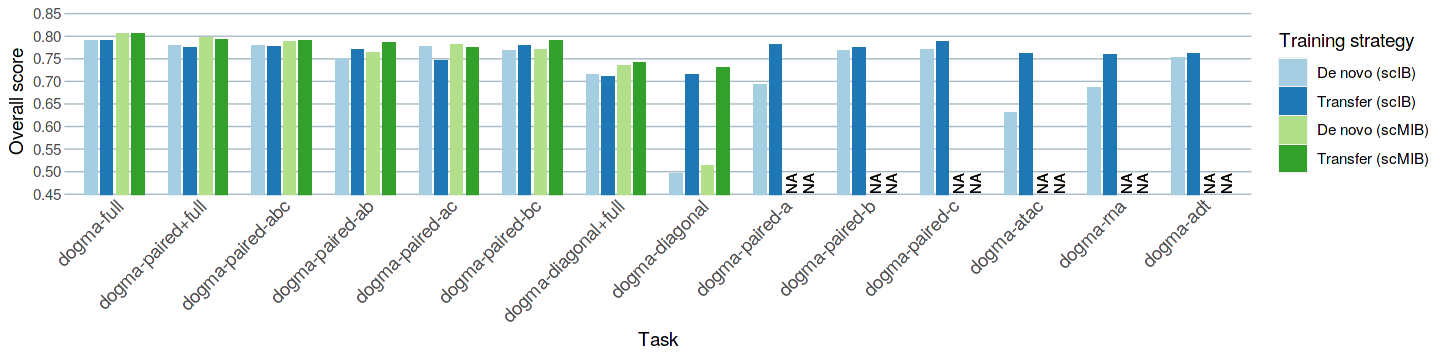

In [37]:
p <- ggplot(data = ib_merge, aes(x = .data[["Task"]],
                                 y = .data[["Overall score"]],
                                 fill = .data[["Training strategy"]], width = 0.6)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.75)) +
scale_fill_brewer(palette = "Paired") +
  scale_y_continuous(
    limits = c(0.45, 0.86), oob = rescale_none,
    breaks = seq(0, 1, by = 0.05),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(
    data = subset(ib_merge, is.na(ib_merge[["Overall score"]])),
    aes(y = 0.45, label = "NA"),
    hjust = 0,
    nudge_x = 0.1,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  geom_text(
    data = subset(ib_merge, is.na(ib_merge[["Overall score"]])),
    aes(y = 0.45, label = "NA"),
    hjust = 0,
    nudge_x = 0.3,
    colour = "black",
    size = 3,
    angle = 90
  )


w <- 12
h <- 3
plt_size(w, h)
p
ggsave(plot = p, file = pj(outdir, "5c_model_transfer_score.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "5c_model_transfer_score.pdf"), width = w, height = h, limitsize = F)

In [38]:
library(reshape)
lb <- as.data.frame(read.xls("data/label_transfer.xlsx"))


Attaching package: 'reshape'


The following objects are masked from 'package:plyr':

    rename, round_any


The following object is masked from 'package:Matrix':

    expand


The following object is masked from 'package:dplyr':

    rename


The following objects are masked from 'package:S4Vectors':

    expand, rename




In [39]:
lb <- melt(lb, id = "Method")
names(lb) <- c("Mapping strategy", "Task", "Micro F1-score")
lb[["Task"]] <- paste0("dogma-", lb[["Task"]])
lb[["Task"]] <- str_replace_all(lb[["Task"]], c("_" = "-",
                                                "paired-full" = "paired+full",
                                                "diagonal-full" = "diagonal+full"
                                                ))

In [40]:

lb[["Mapping strategy"]] <- factor(x = lb[["Mapping strategy"]], levels = c(
    "Query-to-reference",
    "Reference-to-query",
    "Reciprocal"))
lb[["Task"]] <- factor(x = lb[["Task"]], levels = c(
    "dogma-full",
    "dogma-paired+full",
    "dogma-paired-abc",
    "dogma-paired-ab",
    "dogma-paired-ac",
    "dogma-paired-bc",
    "dogma-diagonal+full",
    "dogma-diagonal",
    "dogma-paired-a",
    "dogma-paired-b",
    "dogma-paired-c",
    "dogma-atac",
    "dogma-rna",
    "dogma-adt"))

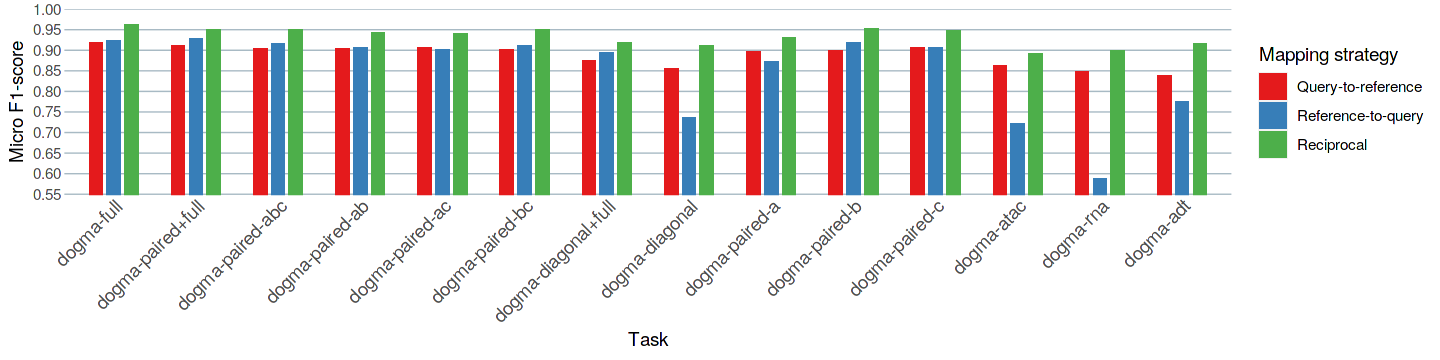

In [41]:
p <- ggplot(data = lb, aes(x = .data[["Task"]],
                           y = .data[["Micro F1-score"]],
                           fill = .data[["Mapping strategy"]], width = 0.5)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.15)) +
scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(
    limits = c(0.55, 1), oob = rescale_none,
    breaks = seq(0, 1, by = 0.05),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


w <- 12
h <- 3
plt_size(w, h)
p

outdir <- "../../paper/5"
mkdir(outdir, remove_old = F)
ggsave(plot = p, file = pj(outdir, "5e_label_transfer_score.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "5e_label_transfer_score.pdf"), width = w, height = h, limitsize = F)

In [114]:
if (scmib_midas) {
    group_batch <- c("iLISI_feat",  "graph_conn_feat",  "kBET_feat", "iLISI_embed", "graph_conn_embed", "kBET_embed")
    group_mod <- c("ASW_mod", "FOSCTTM", "Label_transfer", "AUROC", "Pearson_RNA", "Pearson_ADT")
    group_bio <- c("NMI_feat",  "ARI_feat",  "il_score_f1_feat",  "cLISI_feat", "NMI_embed", "ARI_embed", "il_score_f1_embed", "cLISI_embed")
    metrics_tab <- add_column(metrics_tab, "Task" = metrics_tab[, 1], .after = "Method")
} else {
    group_batch <- c("iLISI", "graph_conn", "kBET")
    group_mod <- NULL
    group_bio <- c("NMI", "ARI", "il_score_f1", "cLISI")
}
n_metrics_batch <- length(group_batch)
n_metrics_mod <- length(group_mod)
n_metrics_bio <- length(group_bio)

Warning message in if (scmib_midas) {:
"the condition has length > 1 and only the first element will be used"


ERROR: Error in if (scmib_midas) {: argument is not interpretable as logical


In [ ]:
names(metrics_tab) <- str_replace_all(names(metrics_tab), c("iLISI" = "Graph iLISI",
                                                            "graph_conn" = "Graph connectivity",
                                                            "il_score_f1" = "Isolated label F1",
                                                            "batch_score" = "Batch correction",
                                                            "ASW_mod" = "Modality ASW",
                                                            "Label_transfer" = "Label transfer F1",
                                                            "AUROC" = "ATAC AUROC",
                                                            "Pearson_RNA" = "RNA Pearson's R",
                                                            "Pearson_ADT" = "ADT Pearson's R",
                                                            "mod_score" = "Modality alignment",
                                                            "cLISI" = "Graph cLISI",
                                                            "bio_score" = "Biological conservation",
                                                            "overall_score" = "Overall score",
                                                            "_embed" = " (embed)",
                                                            "_feat" = " (feat)"
                                                            ))
metrics_tab[, 1] <- str_replace_all(metrics_tab[, 1], c("midas_embed" = "MIDAS-embed",
                                                        "midas_feat\\+wnn" = "MIDAS-feat + WNN",
                                                        "bbknn" = "BBKNN + average",
                                                        "harmony\\+wnn" = "Harmony + WNN",
                                                        "seurat_cca\\+wnn" = "Seurat-CCA + WNN",
                                                        "seurat_rpca\\+wnn" = "Seurat-RPCA + WNN",
                                                        "scanorama_embed\\+wnn" = "Scanorama-embed",
                                                        "pca\\+wnn" = "PCA + WNN",
                                                        "scanorama_feat\\+wnn" = "Scanorama-feat + WNN",
                                                        "liger\\+wnn" = "LIGER + WNN",
                                                        "mofa" = "MOFA",

                                                        "_" = "-",
                                                        "paired-full" = "paired+full",
                                                        "single-full" = "single+full",
                                                        "-single$" = "-single-diag"

                                                        ))
metrics_tab[, 2] <- str_replace_all(metrics_tab[, 2], "dogma_|teadog_|_transfer", "")

In [ ]:
if (scmib_midas) {
    column_info <- data.frame(id = colnames(metrics_tab),
        group = c("Text", "Image", rep("batch_score", (1 + n_metrics_batch)),
                                rep("mod_score", (1 + n_metrics_mod)),
                                rep("bio_score", (1 + n_metrics_bio)), "overall_score"),
        geom = c("text", "image", rep("circle", n_metrics_batch), "bar",
                                rep("circle", n_metrics_mod), "bar",
                                rep("circle", n_metrics_bio), "bar", "bar"),
        width = c(   10.5,   2.5, rep(1, n_metrics_batch), 2,
                                rep(1, n_metrics_mod), 2,
                                rep(1, n_metrics_bio), 2, 2),
        overlay = F)
} else {
    column_info <- data.frame(id = colnames(metrics_tab),
                            group = c("Text", "Image", rep("batch_score", (1 + n_metrics_batch)),
                                                        rep("bio_score", (1 + n_metrics_bio)), "overall_score"),
                            geom =  c("text", "image", rep("circle", n_metrics_batch), "bar",
                                                        rep("circle", n_metrics_bio), "bar", "bar"),
                            width = c(    12,     2.5, rep(1, n_metrics_batch), 2,
                                                        rep(1, n_metrics_bio), 2, 2),
                            overlay = F)
}


In [ ]:
# https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/
palettes <- list("overall_score" = "Oranges",
                 "batch_score" = "Greens",
                 "mod_score" = "PuRd",
                 "bio_score" = "Blues")

In [ ]:
g <- scIB_knit_table(data = metrics_tab, dataset = dataset, column_info = column_info, row_info = data.frame(id = metrics_tab$Method),
                     palettes = palettes, task = T, usability = F)

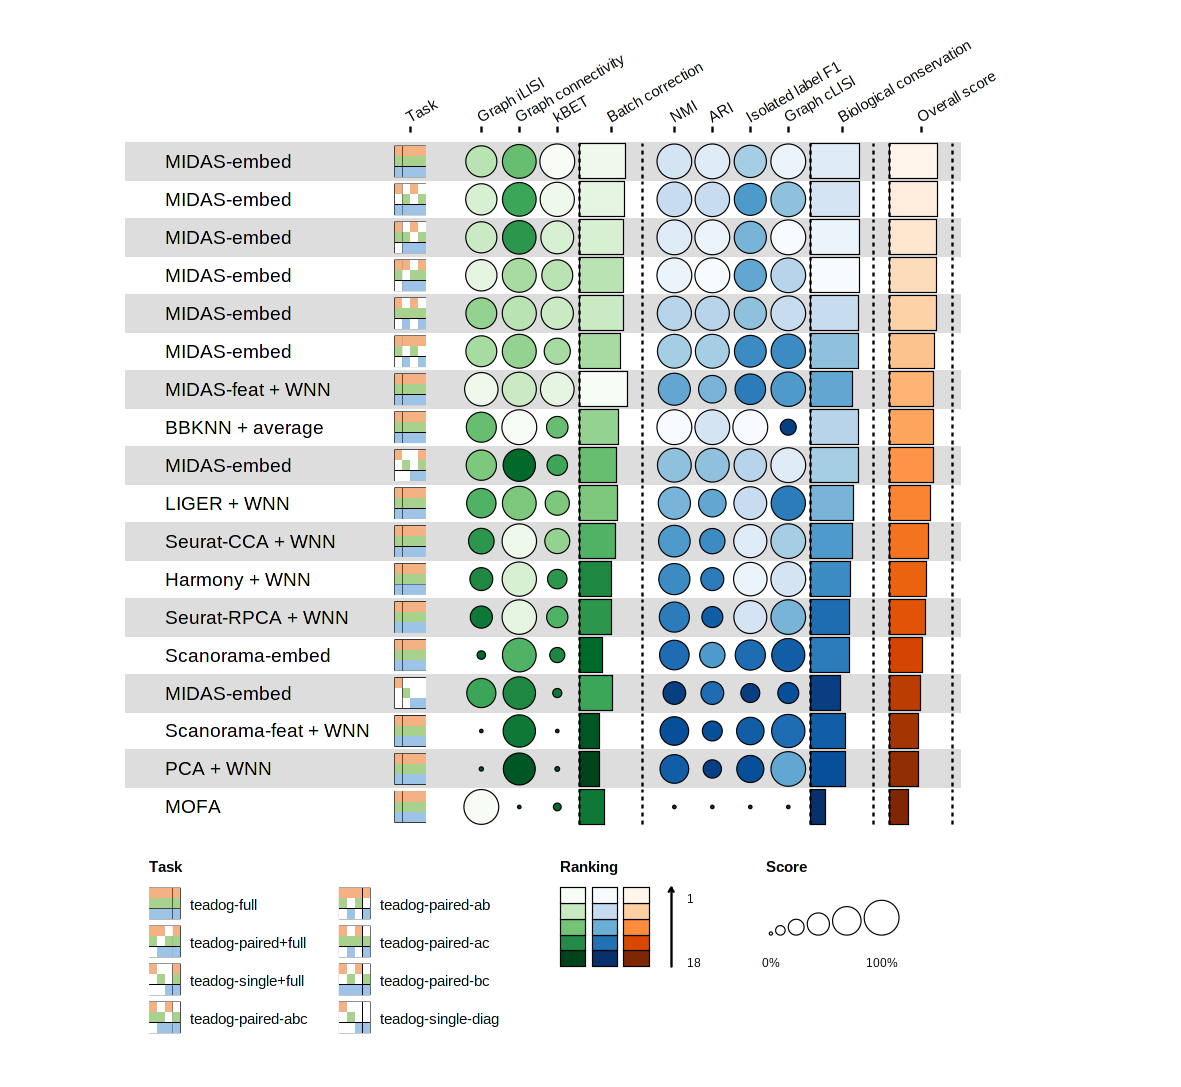

In [ ]:
if (scmib_midas) {
    w <- 300
    h <- 150
} else {
    w <- 250
    h <- 230
}
options(repr.plot.width = w / 25.4, repr.plot.height = h / 25.4)
g

In [ ]:
now <- Sys.time()
ggsave(paste0(outdir, "/", strsplit(basename(xls_metrics_path), split = "\\.")[[1]][1],
    # format(now, "_%Y%m%d_%H%M%S"),  ".png"), g, device = "png", dpi = "retina",
    format(now, "_%Y%m%d"),  ".png"), g, device = "png", dpi = "retina",
    width = w, height = h, units = "mm")